In [1]:
#one hot encoding package
from sklearn.preprocessing import OneHotEncoder

#linear_model for logit regression from sklearn
from sklearn import linear_model

#numpy, pandas for data manipulation
import numpy as np
import pandas as pd

#MySQL connectivity
import mysql.connector as sql

#import sympy for formulaic expression of log-odds ratios, e.g., to produce % success rates from coefficients of logit reg
import sympy
from sympy.solvers import solve
from sympy import Symbol

# importing the requests library
import requests 
import json
import os

#yaml package for cred import
import yaml

In [46]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [2]:
#os.chdir("/db")
os.getcwd()

'C:\\Users\\goyetc\\mlb-machine-learning'

In [3]:
#Note: this is a pandas option to omit the warning that we are performing chained indexing. While one should be careful to avoid
#doing so when unintended (as can produce incorrect results), here we use this approach because .loc method seemed to cause errors in part of the script. If strange results are obtained at some point and no other cause can be identified, this should be revisited. 
#http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
pd.set_option('mode.chained_assignment', None)

In [4]:
#legacy pull from csv
df_csv = pd.read_csv("MLB_90d_raw.csv", encoding = "utf-8-sig").dropna(axis=0)
#df_csv.head()

In [5]:
df_csv.head()

,Unnamed: 0,row_names,des,tfs,tfs_zulu,date,end_speed,pitch_type,count,zone,pitcher,batter,p_throws,stand,inning_side,hitter_val,hv_binary,ptz
0,0,1,Ball,3852,2017-04-03T00:38:52Z,2017-04-02,86.1,FF,0-0,12,593372.0,656941.0,R,L,top,0.250000,0.0,FF_12
1,1,2,Foul,3906,2017-04-03T00:39:06Z,2017-04-02,87.7,SI,1-0,7,593372.0,656941.0,R,L,top,-0.333333,1.0,SI_7
2,2,3,Ball,3926,2017-04-03T00:39:26Z,2017-04-02,89.0,SI,1-1,13,593372.0,656941.0,R,L,top,0.250000,0.0,SI_13
3,3,4,"In play, no out",3943,2017-04-03T00:39:43Z,2017-04-02,77.9,SL,2-1,8,593372.0,656941.0,R,L,top,2.500000,0.0,SL_8
4,4,5,Called Strike,4031,2017-04-03T00:40:31Z,2017-04-02,89.5,SI,0-0,9,593372.0,592178.0,R,R,top,-0.333333,1.0,SI_9


In [156]:
df_csv.loc[df_csv.batter == 596059]

,Unnamed: 0,row_names,des,tfs,tfs_zulu,date,end_speed,pitch_type,count,zone,pitcher,batter,p_throws,stand,inning_side,hitter_val,hv_binary,ptz
1530,1530,619,Called Strike,234029,2017-04-03T23:40:29Z,2017-04-03,85.1,SI,0-0,4,446372.0,596059.0,R,L,bottom,-0.333333,1.0,SI_4
1531,1531,620,Called Strike,234047,2017-04-03T23:40:47Z,2017-04-03,84.2,SL,0-1,12,446372.0,596059.0,R,L,bottom,-0.333333,1.0,SL_12
1532,1532,621,Ball,234112,2017-04-03T23:41:12Z,2017-04-03,81.5,SL,0-2,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,SL_11
1533,1533,622,Foul,234133,2017-04-03T23:41:33Z,2017-04-03,78.0,CU,1-2,6,446372.0,596059.0,R,L,bottom,-0.333333,1.0,CU_6
1534,1534,623,Ball,234203,2017-04-03T23:42:03Z,2017-04-03,84.8,SI,1-2,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,SI_11
1535,1535,624,Ball,234223,2017-04-03T23:42:23Z,2017-04-03,85.3,FF,2-2,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,FF_11
1536,1536,625,"In play, run(s)",234242,2017-04-03T23:42:42Z,2017-04-03,83.5,SI,3-2,2,446372.0,596059.0,R,L,bottom,4.500000,0.0,SI_2
1578,1578,667,"In play, run(s)",936,2017-04-04T00:09:36Z,2017-04-03,82.4,SI,0-0,4,446372.0,596059.0,R,L,bottom,3.000000,0.0,SI_4
1663,1663,752,Ball,10257,2017-04-04T01:02:57Z,2017-04-03,79.9,CU,0-0,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,CU_11
1664,1664,753,Ball,10317,2017-04-04T01:03:17Z,2017-04-03,74.8,CH,1-0,11,446372.0,596059.0,R,L,bottom,0.250000,0.0,CH_11


In [220]:
df_csv['hv_binary'].loc[df_csv.batter == 502239].unique().size

2

In [26]:
#batter_count = df_csv[['batter','tfs','p_throws']].groupby(['batter','p_throws']).agg(['count'])
batter_count = df_csv.groupby(['batter','p_throws']).size().reset_index(name='counts')

In [41]:
batter_count.head()

,batter,p_throws,counts
0,112526.0,R,48
1,134181.0,L,91
2,134181.0,R,378
3,136860.0,L,248
4,136860.0,R,887


In [155]:
batter_count.loc[batter_count.batter == 596059]

,batter,p_throws,counts
1117,596059.0,L,292
1118,596059.0,R,925


In [215]:
batter_count.loc[batter_count.batter == 502239]

,batter,p_throws,counts
493,502239.0,L,9
494,502239.0,R,33


In [136]:
batter_count.sort_values(by=['counts'], ascending = True)

,batter,p_throws,counts
458,502004.0,L,1
893,572000.0,L,1
91,434628.0,L,1
941,573186.0,L,1
943,573244.0,R,1
977,592230.0,L,1
358,474463.0,L,1
565,518748.0,L,1
688,543219.0,R,1
1193,605538.0,L,1


In [199]:
batter_count.batter.unique().size

790

In [42]:
RHP_90d = batter_count.loc[batter_count['p_throws'] == 'R'].drop(columns=['p_throws'])
LHP_90d = batter_count.loc[batter_count['p_throws'] == 'L'].drop(columns=['p_throws'])

In [43]:
RHP_90d.shape, LHP_90d.shape

((769, 2), (670, 2))

In [85]:
print('{0:.0f}% of batters saw a LHP in this time frame.'.format(100*670./769.))

87% of batters saw a LHP in this time frame.


In [88]:
RHP_90d['counts'].describe(), LHP_90d['counts'].describe()

(count     769.000000
 mean      349.933680
 std       353.108775
 min         1.000000
 25%        29.000000
 50%       199.000000
 75%       662.000000
 max      1189.000000
 Name: counts, dtype: float64, count    670.000000
 mean     135.256716
 std      120.812545
 min        1.000000
 25%       22.000000
 50%      104.500000
 75%      233.750000
 max      531.000000
 Name: counts, dtype: float64)

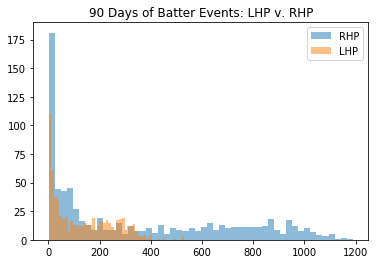

In [72]:
#fig, hist = plt.subplots(1, 2, sharex = True)
bins = 50
plt.hist(RHP_90d['counts'], bins, alpha = 0.5, label = 'RHP')
plt.hist(LHP_90d['counts'], bins, alpha = 0.5, label = 'LHP')
plt.legend(loc='upper right')
plt.title('90 Days of Batter Events: LHP v. RHP')
plt.show()

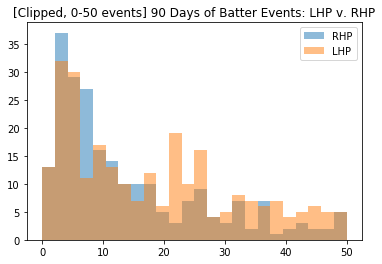

In [76]:
#fig, hist = plt.subplots(1, 2, sharex = True)
bins = np.linspace(0,50,25) 
plt.hist(RHP_90d['counts'], bins, alpha = 0.5, label = 'RHP')
plt.hist(LHP_90d['counts'], bins, alpha = 0.5, label = 'LHP')
plt.legend(loc='upper right')
plt.title('[Clipped, 0-50 events] 90 Days of Batter Events: LHP v. RHP')
plt.show()

#### Summary/Notes, raw data 
- Median # of pitches for batters against RHP in 90 days? 199
- Heavily skew right, aka high density at low event counts
- E.g., 25% is 29 events

##### LHP Notes
- Even more right skew.. note median event count of 104, max of 531 (vs 1189 v. RHP)

##### Thoughts for model
- consider "minimum" event count at 25%, e.g., 22 and 29. 
- this likely will not produce good results.. revisit

In [97]:
batters = df_csv['batter'].unique().tolist()

In [191]:
len(batters)

790

In [170]:
test = []
for i in batters[110:120]:
    test.append(i)
    print(i)

460576.0
425783.0
608577.0
435063.0
608070.0
543228.0
571980.0
596059.0
518960.0
608336.0


In [ ]:
596059

In [109]:
sample = np.random.choice(batters, 30)

In [110]:
len(sample)

30

In [284]:
def main():
    
    print("PREPARE TO MEET YOUR PITCHER'S FRIEND")
    print("...")
    print("..")
    print(".")
    print(" ")
    
    #open MySQL connection, pull data, close connection
    #db_con = sql.connect(host = mlb_host, database = mlb_db, user = mlb_db_user, password = mlb_db_pwd)
    #dataframe = pd.read_sql('SELECT pitcher, batter, p_throws, stand, hv_binary, ptz FROM rawdata_ML LIMIT 200000', con=db_con)
    #db_con.close()
    
    #clean data
    df = clean_data(df_csv)
    
    #define batters of interest by batter ID
    #batters_of_interest = [514888,453568,457759,519317,458015,547180,641355,592450,545361,457705,502671,518626,502517,518934,471865,592178,519346]
    batters_of_interest = batters
    #batters_of_interest = test
    #batters_of_interest = [502239]
    
    #run model on var & batters of interest from current data
    return hv_model(['ptz','hv_binary'],batters_of_interest,df)

def clean_data(data):
    #clean data.. drop N/A, duplicate rows, observe shape
    data.dropna(axis=0)
    data=data.drop_duplicates()
    #df_input.shape
    
    #format pitcher, batter, hv_binary as int
    data[['pitcher','batter','hv_binary']] = data[['pitcher','batter','hv_binary']].astype(int)
    #df.dtypes
    
    return data

def hv_model(features,batters_list,data):
    #main modeling script.. needs to be broken up into smaller functions at some point in the future
    
    #empty dictionary for findings, count to track batter-specific model run #
    global findingsDict
    findingsDict = {}
    
    global analysisDict
    analysisDict = {}
    
    count = 0 
    
    #identify pitcher handedness. Like Jason has yet to see my ambidextrosity, we have yet to see anything more than "L" or "R", but we prefer this method to hard coding :P
    P_throws = data.p_throws.unique()

    #generate results for each batter in list
    for batter_id in batters_list:
        
        #per run (for each batter ID), produce two model results- against left handed pitchers and right handed pitchers
        #note these lists are cleared/recreated for *each* batter_id by nature of their creation within the for loop
        RHPfindingslist = list()
        LHPfindingslist = list()
        
        #status by model run/batter n of N batters, n:{1,N}
        print("")
        count += 1
        print("Run #:"+str(count))
        print("")
        #print('Batter ID:', batter_id)
        
        #Separating right handed pitcher results from LHP results
        for hand in P_throws:
            
            records = data[(data.batter == batter_id) & (data.p_throws == hand)]
            num_events = len(records.index)
            print("")
            print("Batter ID: %s" % (batter_id))
            print("Pitcher-handedness:", hand)
            print("number of events:", num_events)
            print("")
            
            print(records.hv_binary.unique().size)
            
            #prevent batters with too few records from being used
            if num_events != 0 and records.hv_binary.unique().size == 2:
    
                #select features to incorporate into model based on input argument
                var_interest = records[features]

                #ptz variable (pitch_zone combo) is categorical, prep for encoding
                if 'ptz' in var_interest:
                    var_interest.ptz = var_interest.ptz.astype(object)   
                else:
                    pass

                #label space Y: binary representation of hitter_val: if hv <0, 1; else, 0. 
                Y = var_interest[['hv_binary']]
                #print("Y.size:", Y.shape)

                #feature space X: drop labels in 'hv_binary'
                X = var_interest.drop(['hv_binary'], axis = 1)
                #print("X.size:", X.shape)

                #Create count_type var (ahead, behind, even) if including in model
                if 'count' in var_interest:
                    X['Balls'] = X['count'].apply(lambda x: x[:1])
                    X['Strikes'] = X['count'].apply(lambda x: x[-1:])

                    conditions = [(X['Balls'] > X['Strikes']), (X['Balls'] < X['Strikes'])]
                    choices = ['Behind', 'Ahead']
                    X['Count_type'] = np.select(conditions, choices, default='Even')

                    zone = X['zone'].to_frame()

                    #Drop unneeded columns
                    X = X.drop(['count','Balls','Strikes'], axis = 1)

                else:
                    pass

                #Create one_hot encoded predictor array for logistic regression
                X_hot = pd.get_dummies(X)
                #print("X_hot.size:", X_hot.shape)
                
                #create train/test splits
                X_train, X_test, y_train, y_test = train_test_split(X_hot, Y, test_size=0.25, random_state=42)

                #Logistic regression model, initialize function from sklearn
                logit_reg = linear_model.LogisticRegression(random_state = 42)

                #linear regression on one-hot encoded data X and Y HVAL labels
                model = logit_reg.fit(X_train, y_train.values.ravel())

                #Average success, from pitcher's perspective.  Note that this is just the baseline likelihood of predicting the correct outcome by chance. We compare our model accuracy to this value.
                avg_success=y_train.mean().values[0]

                #Baseline pitcher success rate
                #print("Random %s-handed pitcher's baseline success ratio against hitter:" % (hand, , Y.mean())
                if hand == 'R':
                        RHPfindingslist.append(("Based on the last 90 days' worth of pitches against this batter, %s-handed pitchers have a %s success rate." % (hand,"{0:.0f}%".format(avg_success* 100))))
                elif hand == 'L':
                        LHPfindingslist.append(("Based on the last 90 days' worth of pitches against this batter, %s-handed pitchers have a %s success rate." % (hand,"{0:.0f}%".format(avg_success* 100))))
                else:
                    pass

                #logistic regression results
                Results = pd.DataFrame(list(zip(X_hot.columns, np.transpose(model.coef_), np.transpose(np.exp(model.coef_)), abs(np.transpose(np.exp(model.coef_)-1)))))
                Results.columns = ['Recommendation', 'LR_coeff/Log_Odds', 'Odds_Ratio', 'Abs_Odds_Ratio_-1']

                #sorted results
                Results = Results.sort_values(by='Abs_Odds_Ratio_-1', ascending = False)
                Top_5 = Results[['Recommendation','Odds_Ratio']][:5]
                Top_5.Odds_Ratio = Top_5.Odds_Ratio.astype(float)


                #Use sympy to translate logistic regression coefficients into odds ratio, e.g., improved odds of success of choosing this feature
                x = Symbol('x')

                for index,row in Top_5.iterrows():

                    #log-odds ratio calc
                    Top_5.loc[index,'New_Odds'] = solve(Top_5.loc[index,'Odds_Ratio']-((x/(1-x))/(Y.mean()/(1-Y.mean()))), x)

                #string formatting
                Top_5['New_Odds']= Top_5['New_Odds'].str.get(0)
                #print(Top_5['New_Odds'], Top_5['Odds_Ratio'])

                #Creating new series pt:pitch_type and zc:zone_catcher, e.g., zone from catcher's perspective
                #Credit to Benita!
                s= Top_5['Recommendation'].apply(lambda x: x.split('_'))
                Top_5['pt'] = s.apply(lambda x: x[1])
                Top_5['zc'] = s.apply(lambda x: x[2])

                #Translation of codes to descriptive terms: pitch type
                def applyFunc(s):
                    if s == 'FF':
                        return 'four-seam fastball'
                    elif s == 'SI':
                        return 'sinker'
                    elif s == 'SL':
                        return 'slider'
                    elif s == 'KN':
                        return 'knuckleball'
                    elif s == 'CH':
                        return 'change-up'
                    elif s == 'CU':
                        return 'curve-ball'
                    elif s == 'FT':
                        return 'two-seam fastball'
                    return ''

                #create series of descriptive pitch type: zones
                Top_5['pitch_descrip'] = Top_5['pt'].apply(applyFunc)

                def applyFunc2(s):
                    if s == '1':
                        return 'to the top right'
                    elif s == '2':
                        return 'top center'
                    elif s == '3':
                        return 'to the top left'
                    elif s == '4':
                        return 'center right'
                    elif s == '5':
                        return 'down the middle'
                    elif s == '6':
                        return 'center left'
                    elif s == '7':
                        return 'to the bottom right'
                    elif s == '8':
                        return 'bottom center'
                    elif s == '9':
                        return 'to the bottom left'
                    elif s == '10':
                        return 'into outer space'
                    elif s == '11':
                        return 'upper right of strike zone'
                    elif s == '12':
                        return 'upper left of strike zone'
                    elif s == '13':
                        return 'bottom right of strike zone'
                    elif s == '14':
                        return 'bottom left of strike zone'
                    return ''

                #create series to describe zones, mirroring to be seen from pitcher's perspective
                Top_5['zone_descrip'] = Top_5['zc'].apply(applyFunc2)    

                #Print the results!
                print("Based on the last 90 days' worth of pitches against this batter, %s-handed pitchers have a %s success rate." % (hand,"{0:.0f}%".format(avg_success* 100)))
                print("")
                
                model_score = model.score(X_test, y_test)

                for index,row in Top_5.iterrows():
                    print("Throw a %s %s for a success rate of %s." % (Top_5.loc[index,'pitch_descrip'], Top_5.loc[index, 'zone_descrip'], "{0:.0f}%".format(Top_5.loc[index,'New_Odds'] * 100)))

                    if hand == 'R':
                        RHPfindingslist.append("Throw a %s %s for a success rate of %s." % (Top_5.loc[index,'pitch_descrip'], Top_5.loc[index, 'zone_descrip'], "{0:.0f}%".format(Top_5.loc[index,'New_Odds'] * 100)))
                        
                    elif hand == 'L':
                        LHPfindingslist.append("Throw a %s %s for a success rate of %s." % (Top_5.loc[index,'pitch_descrip'], Top_5.loc[index, 'zone_descrip'], "{0:.0f}%".format(Top_5.loc[index,'New_Odds'] * 100)))
                        
                    else:
                        pass

                print("")
                print("Note: Model Accuracy, based on %s pitches:" % num_events, "{0:.0%}".format(model_score))
                print("")
        
                try:
                    if hand == 'R':
                        analysisDict[batter_id] = {'num_events-R': num_events, 'model_score-R': model_score}
                    else:
                        analysisDict[batter_id].update({'num_events-L': num_events, 'model_score-L': model_score})
                except:
                    pass
        
            else:
                print("No Pitches made to this batter by {}-handed pitchers, or all events have same outcome".format(hand))
                continue
           
        print("")
        print("HOORAY!")
        print("")

        #Note- this is dictionary containing findings results per pitcher. 
        findingsDict[batter_id] = {'left_hand_pitcher_findings': LHPfindingslist, 'right_hand_pitcher_findings': RHPfindingslist}

        # api-endpoint
        #URL = 'http://mlb-player-api.cfapps.io/player/%d/insight' % (batter_id)
        #URL = 'http://mlb-api.cfapps.io/player/%d/insight' % (batter_id)
        #try:
        #    r = requests.post(url = URL, json = findingsDict[batter_id])
        #    print("HTTP status code: "+str(r.status_code))
        #    r.raise_for_status()
        #except requests.exceptions.HTTPError as err:
        #    print(err)
        
    return("")


In [285]:
if __name__ == "__main__":   
    
    main()

PREPARE TO MEET YOUR PITCHER'S FRIEND
...
..
.
 

Run #:1


Batter ID: 656941.0
Pitcher-handedness: R
number of events: 869

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a four-seam fastball down the middle for a success rate of 86%.
Throw a four-seam fastball center left for a success rate of 84%.
Throw a four-seam fastball top center for a success rate of 79%.
Throw a sinker bottom center for a success rate of 76%.
Throw a change-up center right for a success rate of 76%.

Note: Model Accuracy, based on 869 pitches: 74%


Batter ID: 656941.0
Pitcher-handedness: L
number of events: 286

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball center right for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 79%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.
Throw a slider d

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a slider down the middle for a success rate of 75%.
Throw a four-seam fastball bottom center for a success rate of 75%.
Throw a curve-ball to the bottom left for a success rate of 75%.
Throw a four-seam fastball down the middle for a success rate of 73%.
Throw a four-seam fastball center left for a success rate of 72%.

Note: Model Accuracy, based on 88 pitches: 83%


HOORAY!


Run #:9


Batter ID: 608365.0
Pitcher-handedness: R
number of events: 740

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center left for a success rate of 85%.
Throw a four-seam fastball to the bottom left for a success rate of 85%.
Throw a four-seam fastball to the top left for a success rate of 81%.
Throw a slider to the bottom left for a success rate of 80%.
Throw a four-seam fastball to the top right for 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 69% success rate.

Throw a slider center left for a success rate of 82%.
Throw a sinker to the bottom right for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a four-seam fastball upper left of strike zone for a success rate of 41%.
Throw a sinker bottom left of strike zone for a success rate of 45%.

Note: Model Accuracy, based on 80 pitches: 75%


Batter ID: 593372.0
Pitcher-handedness: L
number of events: 23

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a change-up upper left of strike zone for a success rate of 71%.
Throw a change-up bottom left of strike zone for a success rate of 71%.
Throw a four-seam fastball upper left of strike zone for a success rate of 65%.
Throw a slider center left for a success rate of 65%.
Throw a four-seam fastball center right for a success rate

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a slider to the bottom left for a success rate of 72%.
Throw a four-seam fastball down the middle for a success rate of 72%.
Throw a sinker to the bottom left for a success rate of 67%.
Throw a change-up bottom center for a success rate of 65%.
Throw a curve-ball bottom left of strike zone for a success rate of 65%.

Note: Model Accuracy, based on 140 pitches: 81%


HOORAY!


Run #:24


Batter ID: 458731.0
Pitcher-handedness: R
number of events: 1106

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a four-seam fastball top center for a success rate of 86%.
Throw a four-seam fastball to the top right for a success rate of 83%.
Throw a four-seam fastball to the bottom right for a success rate of 81%.
Throw a change-up center right for a success rate of 78%.
Throw a slider to the top right for a success rate

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 49% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 84%.
Throw a four-seam fastball center right for a success rate of 79%.
Throw a four-seam fastball to the top left for a success rate of 79%.
Throw a change-up to the bottom right for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 78%.

Note: Model Accuracy, based on 529 pitches: 79%


Batter ID: 543543.0
Pitcher-handedness: L
number of events: 189

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball center left for a success rate of 76%.
Throw a four-seam fastball bottom center for a success rate of 75%.
Throw a four-seam fastball down the middle for a success rate of 75%.
Throw a four-seam fastball center right for a success rate of 75%.
Throw a four-seam fastball to the top right fo

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a slider bottom center for a success rate of 80%.
Throw a four-seam fastball to the top left for a success rate of 80%.
Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a four-seam fastball top center for a success rate of 77%.
Throw a slider to the bottom right for a success rate of 75%.

Note: Model Accuracy, based on 327 pitches: 72%


HOORAY!


Run #:39


Batter ID: 592450.0
Pitcher-handedness: R
number of events: 1119

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a sinker to the bottom left for a success rate of 82%.
Throw a four-seam fastball to the bottom left for a success rate of 79%.
Throw a four-seam fastball bottom center for a success rate of 79%.
Throw a slider center right for a success rate of 76%.
Throw a four-seam fastball to the top left for a success rate

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a four-seam fastball to the bottom left for a success rate of 77%.
Throw a four-seam fastball to the bottom right for a success rate of 76%.
Throw a sinker bottom center for a success rate of 76%.
Throw a slider to the top right for a success rate of 76%.

Note: Model Accuracy, based on 638 pitches: 73%


Batter ID: 452254.0
Pitcher-handedness: L
number of events: 308

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a four-seam fastball center right for a success rate of 79%.
Throw a change-up to the bottom left for a success rate of 77%.
Throw a change-up center left for a success rate of 74%.
Throw a sinker to the bottom left for a success rate of 74%.
Throw a change-up bottom center for a success rate of 74%.

Note: Model Accuracy, 

Throw a four-seam fastball bottom right of strike zone for a success rate of 55%.
Throw a sinker upper left of strike zone for a success rate of 55%.
Throw a sinker upper right of strike zone for a success rate of 73%.
Throw a sinker center left for a success rate of 73%.
Throw a slider to the top right for a success rate of 73%.

Note: Model Accuracy, based on 9 pitches: 67%


HOORAY!


Run #:54


Batter ID: 605412.0
Pitcher-handedness: R
number of events: 840

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball center left for a success rate of 81%.
Throw a slider to the top right for a success rate of 78%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.
Throw a change-up bottom center for a success rate of 77%.
Throw a four-seam fastball center right for a success rate of 76%.

Note: Model Accuracy, based on 840 pitches: 72%


Batter ID: 605412.0
Pitcher-handedness: L
numb

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a sinker center left for a success rate of 79%.
Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a four-seam fastball to the bottom left for a success rate of 76%.
Throw a sinker upper left of strike zone for a success rate of 34%.
Throw a four-seam fastball upper right of strike zone for a success rate of 34%.

Note: Model Accuracy, based on 129 pitches: 78%


Batter ID: 425844.0
Pitcher-handedness: L
number of events: 46

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a slider to the bottom right for a success rate of 75%.
Throw a curve-ball bottom right of strike zone for a success rate of 75%.
Throw a four-seam fastball bottom center for a success rate of 71%.
Throw a curve-ball to the bottom right for a success rate of 71%.
Throw a four-seam fastball center right for a suc

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a four-seam fastball to the top left for a success rate of 74%.
Throw a sinker center left for a success rate of 72%.
Throw a four-seam fastball down the middle for a success rate of 72%.
Throw a slider top center for a success rate of 72%.

Note: Model Accuracy, based on 307 pitches: 76%


HOORAY!


Run #:69


Batter ID: 545361.0
Pitcher-handedness: R
number of events: 709

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 51% success rate.

Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 78%.
Throw a four-seam fastball to the bottom left for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rate of 76%.
Throw a sinker center left for a success rate 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a slider to the bottom right for a success rate of 82%.
Throw a slider bottom center for a success rate of 77%.
Throw a sinker to the bottom left for a success rate of 76%.
Throw a curve-ball to the bottom left for a success rate of 75%.
Throw a slider center right for a success rate of 75%.

Note: Model Accuracy, based on 874 pitches: 70%


Batter ID: 592743.0
Pitcher-handedness: L
number of events: 306

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a four-seam fastball down the middle for a success rate of 84%.
Throw a sinker to the bottom left for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 76%.
Throw a sinker bottom center for a success rate of 73%.
Throw a sinker to the bottom right for a success rate of 73%.

Note: Model Accuracy, based on 306 pitches: 76%



Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a sinker center left for a success rate of 74%.
Throw a sinker down the middle for a success rate of 74%.
Throw a four-seam fastball top center for a success rate of 74%.
Throw a sinker to the bottom left for a success rate of 71%.
Throw a slider bottom center for a success rate of 71%.

Note: Model Accuracy, based on 189 pitches: 76%


HOORAY!


Run #:84


Batter ID: 543760.0
Pitcher-handedness: R
number of events: 145

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a change-up bottom right of strike zone for a success rate of 73%.
Throw a slider to the bottom left for a success rate of 70%.
Throw a four-seam fastball center right for a success rate of 70%.
Throw a sinker center right for a success rate of 70%.
Throw a four-seam fastball center left for a success rate of 70%.

Note: Model Accuracy, base

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a sinker center left for a success rate of 79%.
Throw a slider down the middle for a success rate of 77%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a sinker bottom center for a success rate of 76%.

Note: Model Accuracy, based on 427 pitches: 74%


Batter ID: 493316.0
Pitcher-handedness: L
number of events: 171

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball top center for a success rate of 80%.
Throw a four-seam fastball to the top left for a success rate of 78%.
Throw a four-seam fastball down the middle for a success rate of 76%.
Throw a four-seam fastball bottom center for a success rate of 74%.
Throw a four-seam fastball center left for a success rate of 74%.

Note: Model Accurac

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a slider to the bottom right for a success rate of 83%.
Throw a four-seam fastball center right for a success rate of 82%.
Throw a slider bottom center for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 80%.
Throw a curve-ball center left for a success rate of 78%.

Note: Model Accuracy, based on 350 pitches: 73%


HOORAY!


Run #:99


Batter ID: 446263.0
Pitcher-handedness: R
number of events: 734

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a sinker center right for a success rate of 81%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a curve-ball to the bottom right for a success rate of 78%.
Throw a curve-ball bottom center for a success rate of 78%.
Throw a four-seam fastball to the top left for a success rate of 76%.

Note: Model Accur

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a sinker to the bottom right for a success rate of 77%.
Throw a sinker center left for a success rate of 77%.
Throw a slider to the bottom left for a success rate of 75%.

Note: Model Accuracy, based on 487 pitches: 75%


Batter ID: 607054.0
Pitcher-handedness: L
number of events: 45

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 64% success rate.

Throw a slider bottom right of strike zone for a success rate of 39%.
Throw a four-seam fastball bottom center for a success rate of 75%.
Throw a four-seam fastball center right for a success rate of 75%.
Throw a slider bottom center for a success rate of 75%.
Throw a sinker to the bottom left for a success rate of 75%.

Note: Model Accuracy

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a four-seam fastball to the top right for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a four-seam fastball center right for a success rate of 72%.
Throw a sinker bottom center for a success rate of 72%.
Throw a sinker to the bottom left for a success rate of 72%.

Note: Model Accuracy, based on 230 pitches: 71%


HOORAY!


Run #:114


Batter ID: 435063.0
Pitcher-handedness: R
number of events: 850

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a slider to the bottom left for a success rate of 84%.
Throw a slider bottom center for a success rate of 81%.
Throw a sinker center left for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 81%.
Throw a slider to the top right for a success rate of 78%.

Note: Model Accuracy, bas

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the top right for a success rate of 82%.
Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a change-up down the middle for a success rate of 77%.
Throw a change-up to the bottom left for a success rate of 75%.
Throw a four-seam fastball center right for a success rate of 75%.

Note: Model Accuracy, based on 274 pitches: 74%


HOORAY!


Run #:122


Batter ID: 595777.0
Pitcher-handedness: R
number of events: 215

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 51% success rate.

Throw a change-up to the bottom right for a success rate of 79%.
Throw a slider bottom center for a success rate of 74%.
Throw a sinker to the bottom right for a success rate of 74%.
Throw a four-seam fastball bottom center for a success rate of 72%.
Throw a sinker center right for a success rate of 72%.

No

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 51% success rate.

Throw a four-seam fastball center right for a success rate of 85%.
Throw a slider down the middle for a success rate of 78%.
Throw a curve-ball bottom center for a success rate of 76%.
Throw a four-seam fastball top center for a success rate of 74%.
Throw a knuckleball center right for a success rate of 73%.

Note: Model Accuracy, based on 1012 pitches: 73%


Batter ID: 519346.0
Pitcher-handedness: L
number of events: 294

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a slider to the bottom right for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 81%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a slider top center for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 77%.

Note: Model Accuracy, based

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball to the top left for a success rate of 84%.
Throw a four-seam fastball center right for a success rate of 84%.
Throw a four-seam fastball to the bottom right for a success rate of 81%.
Throw a four-seam fastball bottom center for a success rate of 79%.
Throw a four-seam fastball top center for a success rate of 77%.

Note: Model Accuracy, based on 295 pitches: 75%


HOORAY!


Run #:137


Batter ID: 570267.0
Pitcher-handedness: R
number of events: 965

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball center left for a success rate of 83%.
Throw a four-seam fastball to the bottom left for a success rate of 80%.
Throw a sinker to the bottom right for a success rate of 80%.
Throw a four-seam fastball bottom center for a success rate of 78%.
Throw a slider center left fo

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a slider down the middle for a success rate of 73%.
Throw a change-up upper right of strike zone for a success rate of 24%.
Throw a sinker bottom left of strike zone for a success rate of 28%.
Throw a sinker upper right of strike zone for a success rate of 28%.
Throw a four-seam fastball to the top left for a success rate of 70%.

Note: Model Accuracy, based on 129 pitches: 74%


Batter ID: 543590.0
Pitcher-handedness: L
number of events: 6

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 33% success rate.

Throw a four-seam fastball to the top left for a success rate of 44%.
Throw a four-seam fastball down the middle for a success rate of 44%.
Throw a four-seam fastball upper right of strike zone for a success rate of 22%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 22%.

Note: Model Accuracy, ba

Throw a four-seam fastball to the bottom right for a success rate of 80%.
Throw a sinker to the bottom right for a success rate of 79%.
Throw a slider center right for a success rate of 73%.
Throw a sinker center left for a success rate of 73%.
Throw a curve-ball to the bottom right for a success rate of 73%.

Note: Model Accuracy, based on 370 pitches: 73%


HOORAY!


Run #:152


Batter ID: 572821.0
Pitcher-handedness: R
number of events: 1056

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider to the top left for a success rate of 84%.
Throw a four-seam fastball top center for a success rate of 83%.
Throw a slider top center for a success rate of 82%.
Throw a slider center left for a success rate of 82%.
Throw a four-seam fastball to the top left for a success rate of 81%.

Note: Model Accuracy, based on 1056 pitches: 71%


Batter ID: 572821.0
Pitcher-handedness: L
number of events: 295

2
Based on the last 90

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 53% success rate.

Throw a four-seam fastball center left for a success rate of 83%.
Throw a slider to the top left for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 80%.
Throw a change-up to the bottom right for a success rate of 77%.
Throw a four-seam fastball to the top right for a success rate of 77%.

Note: Model Accuracy, based on 936 pitches: 73%


Batter ID: 593934.0
Pitcher-handedness: L
number of events: 339

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a change-up to the bottom left for a success rate of 84%.
Throw a change-up bottom center for a success rate of 79%.
Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rate of 76%.
Throw a sinker top center for a success rate of 73%.

Note: Model Accuracy,

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a sinker bottom center for a success rate of 87%.
Throw a four-seam fastball center right for a success rate of 86%.
Throw a slider center right for a success rate of 85%.
Throw a sinker down the middle for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 81%.

Note: Model Accuracy, based on 333 pitches: 69%


HOORAY!


Run #:167


Batter ID: 592663.0
Pitcher-handedness: R
number of events: 808

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a sinker bottom center for a success rate of 85%.
Throw a sinker center right for a success rate of 82%.
Throw a four-seam fastball to the bottom right for a success rate of 82%.
Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball down the middle for a success rate of 81%.

Note: Model 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 54% success rate.

Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a sinker center left for a success rate of 80%.
Throw a four-seam fastball to the bottom right for a success rate of 80%.
Throw a four-seam fastball center right for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 78%.

Note: Model Accuracy, based on 1026 pitches: 72%


Batter ID: 519317.0
Pitcher-handedness: L
number of events: 281

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball bottom center for a success rate of 73%.
Throw a four-seam fastball down the middle for a success rate of 73%.
Throw a four-seam fastball center left for a success rate of 71%.
Throw a curve-ball to the bottom left for a success rate of 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 44% success rate.

Throw a four-seam fastball down the middle for a success rate of 62%.
Throw a four-seam fastball top center for a success rate of 55%.
Throw a sinker center right for a success rate of 55%.
Throw a change-up down the middle for a success rate of 55%.
Throw a sinker to the top right for a success rate of 55%.

Note: Model Accuracy, based on 41 pitches: 83%


HOORAY!


Run #:182


Batter ID: 450172.0
Pitcher-handedness: R
number of events: 60

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a sinker upper right of strike zone for a success rate of 76%.
Throw a four-seam fastball center left for a success rate of 76%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 33%.
Throw a four-seam fastball bottom center for a success rate of 37%.
Throw a change-up bottom left of strike zone for a

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 54% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 80%.
Throw a curve-ball to the bottom left for a success rate of 75%.
Throw a slider bottom center for a success rate of 75%.
Throw a four-seam fastball center left for a success rate of 74%.
Throw a change-up center left for a success rate of 73%.

Note: Model Accuracy, based on 336 pitches: 74%


HOORAY!


Run #:190


Batter ID: 459431.0
Pitcher-handedness: R
number of events: 642

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball to the top left for a success rate of 83%.
Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a sinker down the middle for a success rate of 77%.
Throw a slider down the middle for a success rate of 77%.
Throw a curve-ball bottom center for a success rate of 77%.

Note: M

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 63% success rate.

Throw a sinker center left for a success rate of 79%.
Throw a sinker bottom center for a success rate of 79%.
Throw a four-seam fastball center right for a success rate of 78%.
Throw a sinker down the middle for a success rate of 78%.
Throw a four-seam fastball down the middle for a success rate of 78%.

Note: Model Accuracy, based on 116 pitches: 75%


Batter ID: 476451.0
Pitcher-handedness: L
number of events: 39

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 76%.
Throw a four-seam fastball bottom center for a success rate of 73%.
Throw a curve-ball bottom left of strike zone for a success rate of 73%.
Throw a four-seam fastball to the bottom left for a success rate of 73%.
Throw a four-seam fastball center right for a success rate of 73%.

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a four-seam fastball top center for a success rate of 74%.
Throw a change-up bottom center for a success rate of 74%.
Throw a knuckleball bottom right of strike zone for a success rate of 71%.
Throw a four-seam fastball bottom center for a success rate of 71%.
Throw a four-seam fastball center right for a success rate of 71%.

Note: Model Accuracy, based on 152 pitches: 75%


HOORAY!


Run #:205


Batter ID: 571697.0
Pitcher-handedness: R
number of events: 609

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center right for a success rate of 86%.
Throw a four-seam fastball top center for a success rate of 86%.
Throw a four-seam fastball to the bottom right for a success rate of 82%.
Throw a sinker center right for a success rate of 81%.
Throw a four-seam fastball to the top right for

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider center left for a success rate of 81%.
Throw a slider bottom center for a success rate of 78%.
Throw a four-seam fastball center right for a success rate of 78%.
Throw a four-seam fastball to the top left for a success rate of 76%.
Throw a sinker to the top right for a success rate of 75%.

Note: Model Accuracy, based on 820 pitches: 70%


Batter ID: 434670.0
Pitcher-handedness: L
number of events: 204

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a change-up bottom center for a success rate of 76%.
Throw a slider to the bottom left for a success rate of 71%.
Throw a four-seam fastball bottom center for a success rate of 71%.
Throw a four-seam fastball down the middle for a success rate of 71%.
Throw a four-seam fastball top center for a success rate of 68%.

Note: Model Accuracy, based on 204

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a sinker center left for a success rate of 76%.
Throw a four-seam fastball to the bottom right for a success rate of 74%.
Throw a four-seam fastball down the middle for a success rate of 72%.
Throw a slider to the bottom right for a success rate of 69%.
Throw a four-seam fastball top center for a success rate of 69%.

Note: Model Accuracy, based on 209 pitches: 80%


HOORAY!


Run #:220


Batter ID: 467055.0
Pitcher-handedness: R
number of events: 386

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a sinker to the bottom right for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a slider center left for a success rate of 79%.
Throw a four-seam fastball bottom center for a success rate of 79%.
Throw a four-seam fastball to the top right for a success rate of 7

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball top center for a success rate of 83%.
Throw a four-seam fastball center left for a success rate of 82%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball to the top left for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 79%.

Note: Model Accuracy, based on 724 pitches: 72%


Batter ID: 500208.0
Pitcher-handedness: L
number of events: 247

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a sinker center left for a success rate of 75%.
Throw a slider to the bottom right for a success rate of 75%.
Throw a four-seam fastball bottom center for a success rate of 75%.
Throw a four-seam fastball center left for a success rate of 75%.
Throw a four-seam fastball to the top left for a success rate of 72%.

N

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a four-seam fastball center right for a success rate of 72%.
Throw a four-seam fastball top center for a success rate of 72%.
Throw a slider center right for a success rate of 69%.
Throw a slider to the bottom left for a success rate of 65%.
Throw a curve-ball to the top left for a success rate of 65%.

Note: Model Accuracy, based on 204 pitches: 72%


HOORAY!


Run #:235


Batter ID: 468504.0
Pitcher-handedness: R
number of events: 68

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 63% success rate.

Throw a slider to the bottom left for a success rate of 74%.
Throw a slider top center for a success rate of 74%.
Throw a sinker center left for a success rate of 74%.
Throw a sinker to the top left for a success rate of 74%.
Throw a four-seam fastball down the middle for a success rate of 74%.

Note: Model Accuracy, based on 68 pi


Batter ID: 624577.0
Pitcher-handedness: R
number of events: 806

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a sinker to the bottom left for a success rate of 81%.
Throw a slider to the bottom left for a success rate of 79%.
Throw a slider to the top left for a success rate of 78%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.
Throw a four-seam fastball down the middle for a success rate of 77%.

Note: Model Accuracy, based on 806 pitches: 71%


Batter ID: 624577.0
Pitcher-handedness: L
number of events: 289

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 52% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 75%.
Throw a change-up to the bottom left for a success rate of 75%.
Throw a four-seam fastball center right for a success rate of 75%.
Throw a four-seam fastball to the bottom right for a success rate of

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 72% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 82%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 50%.
Throw a four-seam fastball to the top right for a success rate of 80%.
Throw a slider down the middle for a success rate of 80%.
Throw a sinker upper right of strike zone for a success rate of 59%.

Note: Model Accuracy, based on 25 pitches: 80%


HOORAY!


Run #:250


Batter ID: 516416.0
Pitcher-handedness: R
number of events: 710

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a sinker center right for a success rate of 85%.
Throw a slider to the bottom left for a success rate of 82%.
Throw a sinker top center for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a slider top center for a success rate of 79%.

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a sinker to the bottom left for a success rate of 79%.
Throw a sinker center left for a success rate of 78%.
Throw a four-seam fastball bottom center for a success rate of 77%.
Throw a slider to the bottom left for a success rate of 76%.

Note: Model Accuracy, based on 1052 pitches: 70%


Batter ID: 621043.0
Pitcher-handedness: L
number of events: 292

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a four-seam fastball center left for a success rate of 75%.
Throw a four-seam fastball to the bottom left for a success rate of 73%.
Throw a change-up center left for a success rate of 73%.
Throw a curve-ball center left for a success rate of 70%.
Throw a change-up bottom center for a success rate of 70%.

Note: Model Accuracy, based on 292 

Throw a four-seam fastball down the middle for a success rate of 79%.
Throw a sinker to the bottom left for a success rate of 75%.
Throw a four-seam fastball to the top right for a success rate of 74%.
Throw a curve-ball bottom right of strike zone for a success rate of 72%.
Throw a sinker to the bottom right for a success rate of 72%.

Note: Model Accuracy, based on 173 pitches: 78%


HOORAY!


Run #:265


Batter ID: 502481.0
Pitcher-handedness: R
number of events: 836

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 83%.
Throw a slider to the bottom right for a success rate of 78%.
Throw a four-seam fastball bottom center for a success rate of 77%.
Throw a change-up to the bottom right for a success rate of 76%.
Throw a curve-ball to the bottom left for a success rate of 76%.

Note: Model Accuracy, based on 836 pitches: 73%


Batter ID: 502481.0
Pitcher-

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider to the bottom right for a success rate of 80%.
Throw a change-up to the bottom right for a success rate of 79%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a sinker down the middle for a success rate of 76%.
Throw a curve-ball center right for a success rate of 76%.

Note: Model Accuracy, based on 838 pitches: 74%


Batter ID: 452234.0
Pitcher-handedness: L
number of events: 89

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 55% success rate.

Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a slider top center for a success rate of 73%.
Throw a four-seam fastball center right for a success rate of 73%.
Throw a four-seam fastball bottom center for a success rate of 69%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 29%.

Note: 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 70%.
Throw a slider center left for a success rate of 70%.
Throw a slider center right for a success rate of 70%.
Throw a change-up to the bottom right for a success rate of 70%.
Throw a four-seam fastball center left for a success rate of 70%.

Note: Model Accuracy, based on 180 pitches: 76%


HOORAY!


Run #:280


Batter ID: 607680.0
Pitcher-handedness: R
number of events: 927

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball to the top left for a success rate of 83%.
Throw a sinker down the middle for a success rate of 83%.
Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a slider to the bottom left for a success rate of 81%.
Throw a sinker center right for a success rate of 81%.

Note: Model Ac

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 63% success rate.

Throw a slider to the bottom left for a success rate of 80%.
Throw a slider bottom center for a success rate of 80%.
Throw a sinker to the top right for a success rate of 80%.
Throw a sinker down the middle for a success rate of 78%.
Throw a sinker top center for a success rate of 78%.

Note: Model Accuracy, based on 265 pitches: 73%


Batter ID: 572073.0
Pitcher-handedness: L
number of events: 301

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a four-seam fastball top center for a success rate of 83%.
Throw a sinker to the top left for a success rate of 80%.
Throw a change-up center left for a success rate of 80%.
Throw a sinker top center for a success rate of 80%.
Throw a sinker center left for a success rate of 78%.

Note: Model Accuracy, based on 301 pitches: 73%


HOORAY!


Run #:288


Batter ID: 641820

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 64% success rate.

Throw a four-seam fastball center right for a success rate of 78%.
Throw a slider bottom left of strike zone for a success rate of 76%.
Throw a slider to the bottom right for a success rate of 76%.
Throw a four-seam fastball center left for a success rate of 76%.
Throw a curve-ball bottom right of strike zone for a success rate of 38%.

Note: Model Accuracy, based on 125 pitches: 72%


HOORAY!


Run #:295


Batter ID: 519333.0
Pitcher-handedness: R
number of events: 283

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a four-seam fastball to the top left for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 75%.
Throw a four-seam fastball top center for a success rate of 75%.
Throw a slider bottom center for 


Batter ID: 444489.0
Pitcher-handedness: R
number of events: 499

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball top center for a success rate of 81%.
Throw a sinker top center for a success rate of 78%.
Throw a sinker center right for a success rate of 78%.
Throw a four-seam fastball center left for a success rate of 78%.

Note: Model Accuracy, based on 499 pitches: 70%


Batter ID: 444489.0
Pitcher-handedness: L
number of events: 213

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a four-seam fastball down the middle for a success rate of 77%.
Throw a sinker center left for a success rate of 70%.
Throw a four-seam fastball top center for a success rate of 70%.
Throw a knuckleball bottom center for a success rate of 70%.
Throw a slider to the bottom left for a 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a four-seam fastball bottom center for a success rate of 78%.
Throw a sinker center left for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a sinker to the bottom left for a success rate of 76%.
Throw a four-seam fastball to the top left for a success rate of 74%.

Note: Model Accuracy, based on 335 pitches: 71%


HOORAY!


Run #:310


Batter ID: 547989.0
Pitcher-handedness: R
number of events: 1015

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider center left for a success rate of 80%.
Throw a sinker to the bottom right for a success rate of 78%.
Throw a four-seam fastball to the top left for a success rate of 78%.
Throw a four-seam fastball bottom center for a success rate of 78%.
Throw a sinker down the middle for a success rate of 77%.

Note

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball center left for a success rate of 81%.
Throw a change-up to the bottom right for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a sinker down the middle for a success rate of 76%.
Throw a sinker center right for a success rate of 76%.

Note: Model Accuracy, based on 197 pitches: 75%


Batter ID: 605125.0
Pitcher-handedness: L
number of events: 15

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 80% success rate.

Throw a sinker center right for a success rate of 86%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 69%.
Throw a slider bottom left of strike zone for a success rate of 74%.
Throw a four-seam fastball to the top right for a success rate of 83%.
Throw a four-seam fastball to the top left for a success rate of 83%.

No

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a sinker to the bottom left for a success rate of 79%.
Throw a four-seam fastball to the bottom right for a success rate of 79%.
Throw a four-seam fastball center left for a success rate of 79%.
Throw a sinker bottom center for a success rate of 77%.
Throw a four-seam fastball bottom center for a success rate of 75%.

Note: Model Accuracy, based on 238 pitches: 75%


HOORAY!


Run #:325


Batter ID: 453385.0
Pitcher-handedness: R
number of events: 84

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a sinker to the top right for a success rate of 83%.
Throw a four-seam fastball center left for a success rate of 81%.
Throw a sinker to the bottom left for a success rate of 79%.
Throw a sinker to the bottom right for a success rate of 79%.
Throw a slider bottom center for a success rate of 76%.

Note: Model A

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 77% success rate.

Throw a four-seam fastball top center for a success rate of 87%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 52%.
Throw a four-seam fastball upper left of strike zone for a success rate of 54%.
Throw a four-seam fastball to the top left for a success rate of 85%.
Throw a slider center left for a success rate of 85%.

Note: Model Accuracy, based on 53 pitches: 77%


Batter ID: 456501.0
Pitcher-handedness: L
number of events: 43

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 81% success rate.

Throw a four-seam fastball bottom right of strike zone for a success rate of 65%.
Throw a four-seam fastball bottom center for a success rate of 87%.
Throw a four-seam fastball to the bottom right for a success rate of 87%.
Throw a slider upper left of strike zone for a success rate of 69%.
Throw a sinker to the bo

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball top center for a success rate of 78%.
Throw a sinker to the top left for a success rate of 78%.
Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a change-up center right for a success rate of 44%.

Note: Model Accuracy, based on 103 pitches: 69%


Batter ID: 594798.0
Pitcher-handedness: L
number of events: 13

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 77% success rate.

Throw a curve-ball bottom right of strike zone for a success rate of 65%.
Throw a curve-ball to the bottom left for a success rate of 65%.
Throw a slider upper right of strike zone for a success rate of 65%.
Throw a curve-ball center right for a success rate of 81%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 81%


Batter ID: 503449.0
Pitcher-handedness: R
number of events: 28

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a slider bottom left of strike zone for a success rate of 42%.
Throw a sinker bottom right of strike zone for a success rate of 45%.
Throw a sinker to the bottom right for a success rate of 45%.
Throw a curve-ball to the top right for a success rate of 65%.
Throw a curve-ball bottom center for a success rate of 65%.

Note: Model Accuracy, based on 28 pitches: 75%


Batter ID: 503449.0
Pitcher-handedness: L
number of events: 13

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a four-seam fastball to the top right for a success rate of 69%.
Throw a four-seam fastball top center for a success rate of 69%.
Throw a knuckleball bottom right of strike zone for a success rate of 69%.
Throw a knuckleball center right for a success rate of 69%.
Thro

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 47% success rate.

Throw a four-seam fastball to the top right for a success rate of 72%.
Throw a four-seam fastball center right for a success rate of 72%.
Throw a four-seam fastball bottom center for a success rate of 71%.
Throw a four-seam fastball to the top left for a success rate of 71%.
Throw a four-seam fastball to the bottom left for a success rate of 68%.

Note: Model Accuracy, based on 224 pitches: 78%


HOORAY!


Run #:356


Batter ID: 543699.0
Pitcher-handedness: R
number of events: 83

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a four-seam fastball top center for a success rate of 87%.
Throw a change-up bottom center for a success rate of 81%.
Throw a sinker center left for a success rate of 81%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball to the top left fo

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 52% success rate.

Throw a slider top center for a success rate of 76%.
Throw a slider to the bottom left for a success rate of 74%.
Throw a four-seam fastball to the bottom left for a success rate of 72%.
Throw a four-seam fastball to the top left for a success rate of 72%.
Throw a four-seam fastball to the bottom right for a success rate of 69%.

Note: Model Accuracy, based on 429 pitches: 73%


Batter ID: 455759.0
Pitcher-handedness: L
number of events: 210

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% success rate.

Throw a four-seam fastball upper right of strike zone for a success rate of 76%.
Throw a four-seam fastball to the bottom left for a success rate of 72%.
Throw a four-seam fastball to the bottom right for a success rate of 68%.
Throw a four-seam fastball to the top right for a success rate of 66%.
Throw a sinker to the top left for

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a four-seam fastball down the middle for a success rate of 81%.
Throw a four-seam fastball to the top left for a success rate of 80%.
Throw a four-seam fastball center left for a success rate of 80%.
Throw a slider center left for a success rate of 77%.
Throw a sinker down the middle for a success rate of 77%.

Note: Model Accuracy, based on 190 pitches: 80%


Batter ID: 431094.0
Pitcher-handedness: L
number of events: 143

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 51% success rate.

Throw a sinker to the top left for a success rate of 74%.
Throw a four-seam fastball top center for a success rate of 69%.
Throw a four-seam fastball bottom center for a success rate of 69%.
Throw a four-seam fastball to the bottom right for a success rate of 65%.
Throw a four-seam fastball down the middle for a success rate of 65%.

Note: Mode

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center right for a success rate of 86%.
Throw a sinker bottom center for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball to the top left for a success rate of 81%.
Throw a change-up to the bottom right for a success rate of 80%.

Note: Model Accuracy, based on 401 pitches: 75%


Batter ID: 471083.0
Pitcher-handedness: L
number of events: 45

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a four-seam fastball to the top left for a success rate of 72%.
Throw a four-seam fastball down the middle for a success rate of 72%.
Throw a slider center right for a success rate of 68%.
Throw a four-seam fastball center right for a success rate of 68%.
Throw a sinker down the middle for a success rate of 68%.

Note: Model Acc

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the top right for a success rate of 87%.
Throw a four-seam fastball center right for a success rate of 82%.
Throw a four-seam fastball top center for a success rate of 80%.
Throw a change-up to the bottom right for a success rate of 79%.
Throw a sinker top center for a success rate of 78%.

Note: Model Accuracy, based on 603 pitches: 72%


Batter ID: 461865.0
Pitcher-handedness: L
number of events: 127

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 61% success rate.

Throw a sinker down the middle for a success rate of 81%.
Throw a four-seam fastball top center for a success rate of 80%.
Throw a four-seam fastball down the middle for a success rate of 78%.
Throw a sinker center left for a success rate of 78%.
Throw a slider to the bottom right for a success rate of 76%.

Note: Model Accuracy, based on 12

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 75% success rate.

Throw a four-seam fastball upper right of strike zone for a success rate of 65%.
Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a slider bottom right of strike zone for a success rate of 80%.
Throw a slider to the bottom left for a success rate of 80%.

Note: Model Accuracy, based on 4 pitches: 100%


HOORAY!


Run #:395


Batter ID: 642156.0
Pitcher-handedness: R
number of events: 78

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a sinker to the bottom right for a success rate of 73%.
Throw a sinker center left for a success rate of 69%.
Throw a four-seam fastball to the top left for a success rate of 69%.
Throw a four-seam fastball center right for a success rate of 69%.
Throw a slider to the top left for a success rate of 69%.

Note: Model Accuracy, based on 78 pitches: 85%


B

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 78% success rate.

Throw a slider bottom right of strike zone for a success rate of 84%.
Throw a four-seam fastball upper right of strike zone for a success rate of 84%.
Throw a change-up down the middle for a success rate of 84%.
Throw a slider upper left of strike zone for a success rate of 66%.
Throw a change-up bottom right of strike zone for a success rate of 66%.

Note: Model Accuracy, based on 36 pitches: 78%


HOORAY!


Run #:403


Batter ID: 592662.0
Pitcher-handedness: R
number of events: 117

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 69% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 82%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball upper right of strike zone for a success rate of 39%.
Throw a four-seam fastball center left for a success rate of 79%.


Batter ID: 571788.0
Pitcher-handedness: L
number of events: 5

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 20% success rate.

Throw a four-seam fastball to the top left for a success rate of 30%.
Throw a slider bottom right of strike zone for a success rate of 13%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 16%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 16%.

Note: Model Accuracy, based on 5 pitches: 80%


HOORAY!


Run #:411


Batter ID: 593523.0
Pitcher-handedness: R
number of events: 166

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 80%.
Throw a four-seam fastball bottom center for a success rate of 80%.
Throw a sinker to the bottom right for a success rate of 80%.
T


Batter ID: 607536.0
Pitcher-handedness: R
number of events: 73

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 64% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 80%.
Throw a sinker center right for a success rate of 80%.
Throw a four-seam fastball upper left of strike zone for a success rate of 80%.
Throw a slider bottom left of strike zone for a success rate of 78%.
Throw a four-seam fastball upper right of strike zone for a success rate of 32%.

Note: Model Accuracy, based on 73 pitches: 74%


Batter ID: 607536.0
Pitcher-handedness: L
number of events: 42

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 76% success rate.

Throw a slider center left for a success rate of 63%.
Throw a change-up bottom right of strike zone for a success rate of 63%.
Throw a sinker bottom left of strike zone for a success rate of 82%.
Throw a four-seam fastball bottom left of st

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball top center for a success rate of 82%.
Throw a four-seam fastball center right for a success rate of 76%.
Throw a four-seam fastball to the top right for a success rate of 74%.
Throw a sinker bottom center for a success rate of 74%.
Throw a curve-ball center right for a success rate of 74%.

Note: Model Accuracy, based on 305 pitches: 71%


Batter ID: 460026.0
Pitcher-handedness: L
number of events: 212

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 57% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 78%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.
Throw a sinker to the bottom left for a success rate of 72%.
Throw a four-seam fastball center left for a success rate of 72%.
Throw a sinker to the top left for a success rate of 72%.

Note: Model A

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 91% success rate.

Throw a sinker bottom right of strike zone for a success rate of 83%.
Throw a sinker upper left of strike zone for a success rate of 86%.
Throw a change-up upper left of strike zone for a success rate of 93%.
Throw a sinker bottom left of strike zone for a success rate of 93%.
Throw a four-seam fastball upper left of strike zone for a success rate of 93%.

Note: Model Accuracy, based on 22 pitches: 91%


HOORAY!


Run #:436


Batter ID: 641771.0
Pitcher-handedness: R
number of events: 69

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 71% success rate.

Throw a sinker center right for a success rate of 81%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball bottom center for a success rate of 81%.
Throw a four-seam fastball upper right of strike zone for a success rate of 48%.
Throw a sin

Throw a knuckleball to the top left for a success rate of 73%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 73%.
Throw a curve-ball bottom left of strike zone for a success rate of 73%.
Throw a sinker down the middle for a success rate of 88%.
Throw a four-seam fastball center right for a success rate of 88%.

Note: Model Accuracy, based on 24 pitches: 83%


HOORAY!


Run #:444


Batter ID: 276520.0
Pitcher-handedness: R
number of events: 62

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 69% success rate.

Throw a four-seam fastball down the middle for a success rate of 82%.
Throw a sinker bottom right of strike zone for a success rate of 82%.
Throw a sinker to the top left for a success rate of 80%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 43%.
Throw a sinker bottom left of strike zone for a success rate of 47%.

Note: Model Accuracy, based on 62 pitches: 77%


Batter ID: 2

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball to the top left for a success rate of 77%.
Throw a curve-ball to the bottom right for a success rate of 73%.
Throw a curve-ball bottom right of strike zone for a success rate of 27%.
Throw a knuckleball bottom right of strike zone for a success rate of 69%.
Throw a slider bottom center for a success rate of 69%.

Note: Model Accuracy, based on 145 pitches: 67%


HOORAY!


Run #:452


Batter ID: 605400.0
Pitcher-handedness: R
number of events: 69

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 61% success rate.

Throw a sinker bottom center for a success rate of 78%.
Throw a four-seam fastball top center for a success rate of 76%.
Throw a slider center left for a success rate of 76%.
Throw a four-seam fastball to the top right for a success rate of 76%.
Throw a slider upper right of strike zone for a success 


Batter ID: 501593.0
Pitcher-handedness: R
number of events: 9

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a four-seam fastball upper right of strike zone for a success rate of 77%.
Throw a sinker upper right of strike zone for a success rate of 47%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 55%.
Throw a four-seam fastball to the top right for a success rate of 73%.
Throw a sinker to the top right for a success rate of 73%.

Note: Model Accuracy, based on 9 pitches: 100%


Batter ID: 501593.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:462


Batter ID: 570560.0
Pitcher-handedness: R
number of events: 656

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball bottom center for a success rate of 83

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a four-seam fastball upper right of strike zone for a success rate of 68%.
Throw a four-seam fastball center left for a success rate of 68%.
Throw a four-seam fastball bottom center for a success rate of 68%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 49%.
Throw a slider bottom right of strike zone for a success rate of 49%.

Note: Model Accuracy, based on 5 pitches: 100%


HOORAY!


Run #:470


Batter ID: 622072.0
Pitcher-handedness: R
number of events: 72

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a four-seam fastball to the bottom left for a success rate of 78%.
Throw a four-seam fastball down the middle for a success rate of 78%.
Throw a four-seam fastball center right for a success rate of 75%.
Throw a sinker down the middle for a success rate of 75%.
Throw a f


Batter ID: 502273.0
Pitcher-handedness: L
number of events: 17

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 47% success rate.

Throw a four-seam fastball bottom right of strike zone for a success rate of 63%.
Throw a slider bottom right of strike zone for a success rate of 21%.
Throw a sinker bottom left of strike zone for a success rate of 30%.
Throw a four-seam fastball center left for a success rate of 56%.
Throw a sinker to the top right for a success rate of 56%.

Note: Model Accuracy, based on 17 pitches: 94%


HOORAY!


Run #:478


Batter ID: 605388.0
Pitcher-handedness: R
number of events: 18

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 50% success rate.

Throw a four-seam fastball bottom center for a success rate of 67%.
Throw a change-up bottom left of strike zone for a success rate of 60%.
Throw a four-seam fastball upper left of strike zone for a success rate of 60%.
Throw a fou

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 65% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 76%.
Throw a sinker bottom right of strike zone for a success rate of 44%.
Throw a change-up bottom right of strike zone for a success rate of 53%.
Throw a four-seam fastball upper right of strike zone for a success rate of 53%.
Throw a sinker to the bottom right for a success rate of 53%.

Note: Model Accuracy, based on 17 pitches: 94%


HOORAY!


Run #:487


Batter ID: 501571.0
Pitcher-handedness: R
number of events: 263

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball center left for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 78%.
Throw a slider to the bottom left for a success rate of 74%.
Throw a sinker bottom center for a success rate of 74%.
Throw a four-seam fastball center r

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 56% success rate.

Throw a curve-ball bottom left of strike zone for a success rate of 73%.
Throw a slider down the middle for a success rate of 69%.
Throw a slider to the bottom left for a success rate of 69%.
Throw a four-seam fastball upper left of strike zone for a success rate of 32%.
Throw a slider upper right of strike zone for a success rate of 32%.

Note: Model Accuracy, based on 34 pitches: 82%


HOORAY!


Run #:495


Batter ID: 543094.0
Pitcher-handedness: R
number of events: 211

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 78%.
Throw a sinker to the bottom left for a success rate of 74%.
Throw a four-seam fastball to the top left for a success rate of 71%.
Throw a four-seam fastball down the middle for a success rate of 71%.
Throw a sinker bottom cente


Batter ID: 622194.0
Pitcher-handedness: L
number of events: 24

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 58% success rate.

Throw a four-seam fastball to the top right for a success rate of 72%.
Throw a four-seam fastball to the top left for a success rate of 72%.
Throw a four-seam fastball to the bottom left for a success rate of 72%.
Throw a four-seam fastball upper left of strike zone for a success rate of 34%.
Throw a slider bottom right of strike zone for a success rate of 67%.

Note: Model Accuracy, based on 24 pitches: 83%


HOORAY!


Run #:505


Batter ID: 592332.0
Pitcher-handedness: R
number of events: 5

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 40% success rate.

Throw a sinker bottom right of strike zone for a success rate of 51%.
Throw a four-seam fastball upper right of strike zone for a success rate of 32%.
Throw a slider upper right of strike zone for a success rate of

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a four-seam fastball bottom center for a success rate of 85%.
Throw a slider to the bottom left for a success rate of 84%.
Throw a four-seam fastball center left for a success rate of 82%.
Throw a four-seam fastball to the bottom right for a success rate of 81%.
Throw a curve-ball center left for a success rate of 78%.

Note: Model Accuracy, based on 781 pitches: 75%


Batter ID: 621035.0
Pitcher-handedness: L
number of events: 241

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 49% success rate.

Throw a four-seam fastball to the top left for a success rate of 71%.
Throw a four-seam fastball top center for a success rate of 71%.
Throw a sinker to the top right for a success rate of 68%.
Throw a four-seam fastball to the top right for a success rate of 68%.
Throw a slider center right for a success rate of 68%.

Note: Model Accu


Batter ID: 642162.0
Pitcher-handedness: L
number of events: 160

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a four-seam fastball top center for a success rate of 78%.
Throw a curve-ball center left for a success rate of 77%.
Throw a sinker to the top left for a success rate of 74%.
Throw a change-up center left for a success rate of 74%.
Throw a four-seam fastball bottom center for a success rate of 74%.

Note: Model Accuracy, based on 160 pitches: 77%


HOORAY!


Run #:522


Batter ID: 492802.0
Pitcher-handedness: R
number of events: 96

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 65% success rate.

Throw a slider bottom left of strike zone for a success rate of 80%.
Throw a four-seam fastball center right for a success rate of 78%.
Throw a sinker to the bottom right for a success rate of 78%.
Throw a sinker down the middle for a success rate of 78%.
Throw a chang

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a sinker center right for a success rate of 73%.
Throw a sinker bottom left of strike zone for a success rate of 41%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 68%.
Throw a four-seam fastball top center for a success rate of 68%.
Throw a four-seam fastball center right for a success rate of 68%.

Note: Model Accuracy, based on 15 pitches: 100%


Batter ID: 656756.0
Pitcher-handedness: L
number of events: 5

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 20% success rate.

Throw a four-seam fastball to the bottom right for a success rate of 30%.
Throw a four-seam fastball upper left of strike zone for a success rate of 13%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 16%.
Throw a four-seam fastball to the top left for a success rate of 16%.

Note: Model Accuracy,

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 71% success rate.

Throw a four-seam fastball bottom left of strike zone for a success rate of 51%.
Throw a four-seam fastball upper right of strike zone for a success rate of 77%.
Throw a four-seam fastball upper left of strike zone for a success rate of 77%.
Throw a four-seam fastball center left for a success rate of 77%.
Throw a four-seam fastball to the bottom right for a success rate of 77%.

Note: Model Accuracy, based on 7 pitches: 100%


Batter ID: 554374.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:540


Batter ID: 624414.0
Pitcher-handedness: R
number of events: 312

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 59% success rate.

Throw a four-seam fastball center left for a success rate of 81%.
Throw a four-seam fastball down the middle f

Note: Model Accuracy, based on 48 pitches: 79%


Batter ID: 608566.0
Pitcher-handedness: L
number of events: 22

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 73% success rate.

Throw a slider bottom left of strike zone for a success rate of 81%.
Throw a sinker upper left of strike zone for a success rate of 81%.
Throw a sinker bottom left of strike zone for a success rate of 81%.
Throw a change-up bottom left of strike zone for a success rate of 61%.
Throw a slider bottom right of strike zone for a success rate of 61%.

Note: Model Accuracy, based on 22 pitches: 73%


HOORAY!


Run #:549


Batter ID: 543475.0
Pitcher-handedness: R
number of events: 11

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 55% success rate.

Throw a slider bottom left of strike zone for a success rate of 37%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 63%.
Throw a four-seam fastball bot

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a sinker to the top right for a success rate of 76%.
Throw a four-seam fastball center right for a success rate of 74%.
Throw a four-seam fastball to the top right for a success rate of 74%.
Throw a slider bottom center for a success rate of 71%.
Throw a slider to the bottom right for a success rate of 71%.

Note: Model Accuracy, based on 222 pitches: 75%


HOORAY!


Run #:557


Batter ID: 519294.0
Pitcher-handedness: R
number of events: 2

1
No Pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 519294.0
Pitcher-handedness: L
number of events: 6

1
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:558


Batter ID: 572669.0
Pitcher-handedness: R
number of events: 58

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 64% success rate.

Thro

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 74%.
Throw a four-seam fastball to the top left for a success rate of 69%.
Throw a curve-ball bottom left of strike zone for a success rate of 49%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 49%.

Note: Model Accuracy, based on 5 pitches: 100%


Batter ID: 592127.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:567


Batter ID: 571912.0
Pitcher-handedness: R
number of events: 272

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 63% success rate.

Throw a slider to the bottom left for a success rate of 81%.
Throw a sinker top center for a success rate of 81%.
Throw a four-seam fastball down the middle for a success rate of 81%.
Thro

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 36% success rate.

Throw a four-seam fastball to the top right for a success rate of 47%.
Throw a slider center right for a success rate of 47%.
Throw a four-seam fastball upper right of strike zone for a success rate of 21%.
Throw a curve-ball bottom center for a success rate of 29%.
Throw a sinker bottom right of strike zone for a success rate of 29%.

Note: Model Accuracy, based on 14 pitches: 79%


HOORAY!


Run #:576


Batter ID: 543557.0
Pitcher-handedness: R
number of events: 44

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 75% success rate.

Throw a curve-ball to the bottom right for a success rate of 84%.
Throw a sinker bottom center for a success rate of 84%.
Throw a slider upper right of strike zone for a success rate of 53%.
Throw a slider bottom right of strike zone for a success rate of 82%.
Throw a sinker to the bottom right for a succe


Batter ID: 489334.0
Pitcher-handedness: R
number of events: 25

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 64% success rate.

Throw a four-seam fastball bottom left of strike zone for a success rate of 45%.
Throw a four-seam fastball upper left of strike zone for a success rate of 52%.
Throw a sinker upper right of strike zone for a success rate of 52%.
Throw a four-seam fastball to the top right for a success rate of 71%.
Throw a four-seam fastball to the top left for a success rate of 71%.

Note: Model Accuracy, based on 25 pitches: 72%


Batter ID: 489334.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:585


Batter ID: 640463.0
Pitcher-handedness: R
number of events: 17

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 71% success rate.

Throw a four-seam fastball center left for a success ra


Batter ID: 488912.0
Pitcher-handedness: L
number of events: 58

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 69% success rate.

Throw a four-seam fastball center left for a success rate of 82%.
Throw a change-up bottom left of strike zone for a success rate of 46%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 47%.
Throw a slider to the bottom left for a success rate of 77%.
Throw a change-up down the middle for a success rate of 77%.

Note: Model Accuracy, based on 58 pitches: 76%


HOORAY!


Run #:595


Batter ID: 571918.0
Pitcher-handedness: R
number of events: 361

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a four-seam fastball center left for a success rate of 83%.
Throw a four-seam fastball top center for a success rate of 82%.
Throw a four-seam fastball center right for a success rate of 82%.
Throw a slider to the bottom left for


Batter ID: 595918.0
Pitcher-handedness: R
number of events: 7

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 71% success rate.

Throw a four-seam fastball bottom left of strike zone for a success rate of 51%.
Throw a four-seam fastball to the top right for a success rate of 77%.
Throw a four-seam fastball upper right of strike zone for a success rate of 77%.
Throw a four-seam fastball center right for a success rate of 77%.
Throw a four-seam fastball down the middle for a success rate of 77%.

Note: Model Accuracy, based on 7 pitches: 100%


Batter ID: 595918.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:606


Batter ID: 573244.0
Pitcher-handedness: R
number of events: 1

1
No Pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 573244.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 50% success rate.

Throw a sinker bottom right of strike zone for a success rate of 67%.
Throw a sinker top center for a success rate of 60%.
Throw a sinker center right for a success rate of 60%.
Throw a knuckleball upper right of strike zone for a success rate of 40%.
Throw a knuckleball bottom right of strike zone for a success rate of 40%.

Note: Model Accuracy, based on 10 pitches: 90%


Batter ID: 607259.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:618


Batter ID: 571718.0
Pitcher-handedness: R
number of events: 466

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 51% success rate.

Throw a four-seam fastball down the middle for a success rate of 80%.
Throw a change-up to the bottom right for a success rate of 75%.
Throw a four-seam fastball bot

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 81% success rate.

Throw a four-seam fastball center right for a success rate of 86%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 70%.
Throw a sinker bottom left of strike zone for a success rate of 75%.
Throw a sinker down the middle for a success rate of 75%.
Throw a change-up center left for a success rate of 84%.

Note: Model Accuracy, based on 16 pitches: 81%


HOORAY!


Run #:628


Batter ID: 542513.0
Pitcher-handedness: R
number of events: 10

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 50% success rate.

Throw a change-up bottom right of strike zone for a success rate of 60%.
Throw a four-seam fastball to the top right for a success rate of 60%.
Throw a four-seam fastball down the middle for a success rate of 60%.
Throw a slider bottom left of strike zone for a success rate of 60%.
Throw a four-seam fastball u


Batter ID: 449107.0
Pitcher-handedness: L
number of events: 14

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 64% success rate.

Throw a sinker center left for a success rate of 75%.
Throw a sinker upper left of strike zone for a success rate of 52%.
Throw a sinker bottom left of strike zone for a success rate of 52%.
Throw a slider upper right of strike zone for a success rate of 52%.
Throw a sinker to the top left for a success rate of 71%.

Note: Model Accuracy, based on 14 pitches: 64%


HOORAY!


Run #:638


Batter ID: 572750.0
Pitcher-handedness: R
number of events: 57

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 75% success rate.

Throw a sinker bottom left of strike zone for a success rate of 46%.
Throw a sinker bottom right of strike zone for a success rate of 83%.
Throw a four-seam fastball bottom center for a success rate of 83%.
Throw a four-seam fastball bottom left of strike zon


Batter ID: 570481.0
Pitcher-handedness: R
number of events: 74

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 57% success rate.

Throw a four-seam fastball down the middle for a success rate of 73%.
Throw a four-seam fastball to the bottom left for a success rate of 73%.
Throw a four-seam fastball to the bottom right for a success rate of 69%.
Throw a slider bottom right of strike zone for a success rate of 69%.
Throw a knuckleball bottom left of strike zone for a success rate of 69%.

Note: Model Accuracy, based on 74 pitches: 85%


Batter ID: 570481.0
Pitcher-handedness: L
number of events: 91

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 68% success rate.

Throw a four-seam fastball down the middle for a success rate of 83%.
Throw a four-seam fastball to the top right for a success rate of 81%.
Throw a four-seam fastball bottom center for a success rate of 79%.
Throw a slider bottom left of

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:656


Batter ID: 621121.0
Pitcher-handedness: R
number of events: 9

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a four-seam fastball to the top right for a success rate of 64%.
Throw a four-seam fastball top center for a success rate of 64%.
Throw a four-seam fastball to the top left for a success rate of 64%.
Throw a four-seam fastball down the middle for a success rate of 64%.
Throw a four-seam fastball bottom center for a success rate of 64%.

Note: Model Accuracy, based on 9 pitches: 100%


Batter ID: 621121.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:657


Batter ID: 607352.0
Pitcher-handedness: R
number of events: 10

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers 

Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 67% success rate.

Throw a four-seam fastball center right for a success rate of 74%.
Throw a four-seam fastball to the bottom left for a success rate of 74%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 56%.

Note: Model Accuracy, based on 3 pitches: 100%


HOORAY!


Run #:666


Batter ID: 546990.0
Pitcher-handedness: R
number of events: 15

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 67% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 77%.
Throw a four-seam fastball to the top left for a success rate of 77%.
Throw a slider top center for a success rate of 55%.
Throw a four-seam fastball to the bottom right for a success rate of 73%.
Throw a slider upper right of strike zone for a success rate of 73%.

Note: Model Accuracy, based on 15 pitches: 67%


Batter ID: 546990.0
Pitche


Batter ID: 518542.0
Pitcher-handedness: R
number of events: 25

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 44% success rate.

Throw a four-seam fastball bottom left of strike zone for a success rate of 55%.
Throw a sinker bottom center for a success rate of 55%.
Throw a curve-ball bottom center for a success rate of 55%.
Throw a curve-ball to the bottom left for a success rate of 55%.
Throw a four-seam fastball to the top right for a success rate of 55%.

Note: Model Accuracy, based on 25 pitches: 92%


Batter ID: 518542.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:678


Batter ID: 641319.0
Pitcher-handedness: R
number of events: 60

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 58% success rate.

Throw a sinker down the middle for a success rate of 71%.
Throw a sinker upper left of strike


Batter ID: 614173.0
Pitcher-handedness: L
number of events: 67

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 69% success rate.

Throw a four-seam fastball center right for a success rate of 83%.
Throw a slider center left for a success rate of 82%.
Throw a four-seam fastball bottom center for a success rate of 80%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 34%.
Throw a slider upper left of strike zone for a success rate of 46%.

Note: Model Accuracy, based on 67 pitches: 78%


HOORAY!


Run #:688


Batter ID: 533167.0
Pitcher-handedness: R
number of events: 5

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a change-up bottom right of strike zone for a success rate of 68%.
Throw a four-seam fastball to the top right for a success rate of 68%.
Throw a sinker bottom center for a success rate of 68%.
Throw a four-seam fastball upper right 


Batter ID: 593525.0
Pitcher-handedness: R
number of events: 94

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 56% success rate.

Throw a slider to the bottom left for a success rate of 72%.
Throw a slider down the middle for a success rate of 72%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 28%.
Throw a sinker to the bottom left for a success rate of 69%.
Throw a sinker top center for a success rate of 69%.

Note: Model Accuracy, based on 94 pitches: 83%


Batter ID: 593525.0
Pitcher-handedness: L
number of events: 22

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 45% success rate.

Throw a four-seam fastball center right for a success rate of 63%.
Throw a sinker to the bottom left for a success rate of 63%.
Throw a change-up to the bottom left for a success rate of 56%.
Throw a sinker to the top right for a success rate of 56%.
Throw a sinker center left for a s


Batter ID: 594772.0
Pitcher-handedness: L
number of events: 6

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 33% success rate.

Throw a four-seam fastball to the top right for a success rate of 44%.
Throw a four-seam fastball top center for a success rate of 44%.
Throw a four-seam fastball upper left of strike zone for a success rate of 19%.
Throw a four-seam fastball upper right of strike zone for a success rate of 26%.

Note: Model Accuracy, based on 6 pitches: 100%


HOORAY!


Run #:707


Batter ID: 621433.0
Pitcher-handedness: R
number of events: 44

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 66% success rate.

Throw a four-seam fastball to the top right for a success rate of 78%.
Throw a sinker upper right of strike zone for a success rate of 33%.
Throw a knuckleball bottom left of strike zone for a success rate of 76%.
Throw a sinker center left for a success rate of 76%.
Throw a four-

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a four-seam fastball bottom left of strike zone for a success rate of 35%.
Throw a change-up bottom left of strike zone for a success rate of 41%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 50%.
Throw a four-seam fastball top center for a success rate of 50%.
Throw a sinker bottom right of strike zone for a success rate of 50%.

Note: Model Accuracy, based on 21 pitches: 86%


Batter ID: 607732.0
Pitcher-handedness: L
number of events: 5

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 60% success rate.

Throw a change-up down the middle for a success rate of 68%.
Throw a four-seam fastball center left for a success rate of 68%.
Throw a slider upper right of strike zone for a success rate of 68%.
Throw a change-up to the bottom left for a success rate of 49%.
Throw a four-seam fastball bottom lef

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 25% success rate.

Throw a sinker to the bottom left for a success rate of 36%.
Throw a sinker bottom right of strike zone for a success rate of 15%.
Throw a sinker center left for a success rate of 20%.
Throw a slider bottom left of strike zone for a success rate of 20%.
Throw a sinker upper right of strike zone for a success rate of 29%.

Note: Model Accuracy, based on 8 pitches: 75%


Batter ID: 453178.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:726


Batter ID: 621244.0
Pitcher-handedness: R
number of events: 5

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 40% success rate.

Throw a four-seam fastball to the top right for a success rate of 51%.
Throw a four-seam fastball top center for a success rate of 51%.
Throw a four-seam fastball upper rig


Batter ID: 519166.0
Pitcher-handedness: R
number of events: 0

0
No Pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 519166.0
Pitcher-handedness: L
number of events: 4

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 75% success rate.

Throw a slider bottom right of strike zone for a success rate of 65%.
Throw a curve-ball bottom right of strike zone for a success rate of 80%.
Throw a four-seam fastball bottom right of strike zone for a success rate of 80%.
Throw a four-seam fastball top center for a success rate of 80%.

Note: Model Accuracy, based on 4 pitches: 100%


HOORAY!


Run #:736


Batter ID: 450306.0
Pitcher-handedness: R
number of events: 2

1
No Pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 450306.0
Pitcher-handedness: L
number of events: 10

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 50% 

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 29%.
Throw a four-seam fastball to the bottom left for a success rate of 72%.
Throw a change-up down the middle for a success rate of 72%.
Throw a change-up bottom center for a success rate of 72%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 36%.

Note: Model Accuracy, based on 50 pitches: 74%


Batter ID: 656305.0
Pitcher-handedness: L
number of events: 17

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 53% success rate.

Throw a sinker bottom left of strike zone for a success rate of 26%.
Throw a change-up bottom left of strike zone for a success rate of 34%.
Throw a change-up bottom right of strike zone for a success rate of 61%.
Throw a change-up to the top left for a success rate of 61%.
Throw a change-up to the bottom right

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 62% success rate.

Throw a four-seam fastball top center for a success rate of 76%.
Throw a slider upper right of strike zone for a success rate of 31%.
Throw a sinker bottom right of strike zone for a success rate of 73%.
Throw a four-seam fastball bottom center for a success rate of 73%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 45%.

Note: Model Accuracy, based on 58 pitches: 72%


Batter ID: 573088.0
Pitcher-handedness: L
number of events: 59

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 63% success rate.

Throw a sinker bottom center for a success rate of 74%.
Throw a sinker center left for a success rate of 74%.
Throw a four-seam fastball to the top right for a success rate of 74%.
Throw a four-seam fastball to the top left for a success rate of 74%.
Throw a slider bottom left of strike zone for a success rate o

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 68% success rate.

Throw a curve-ball to the bottom right for a success rate of 79%.
Throw a four-seam fastball center right for a success rate of 79%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 45%.
Throw a slider to the bottom left for a success rate of 77%.
Throw a four-seam fastball center left for a success rate of 77%.

Note: Model Accuracy, based on 56 pitches: 71%


Batter ID: 624507.0
Pitcher-handedness: L
number of events: 13

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 62% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 42%.
Throw a curve-ball top center for a success rate of 69%.
Throw a curve-ball to the bottom right for a success rate of 69%.
Throw a curve-ball to the bottom left for a success rate of 69%.
Throw a four-seam fastball down the middle for a success 


Batter ID: 518715.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:777


Batter ID: 642180.0
Pitcher-handedness: R
number of events: 49

2
Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 51% success rate.

Throw a slider down the middle for a success rate of 67%.
Throw a four-seam fastball to the bottom right for a success rate of 67%.
Throw a four-seam fastball upper right of strike zone for a success rate of 26%.
Throw a curve-ball upper right of strike zone for a success rate of 30%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 62%.

Note: Model Accuracy, based on 49 pitches: 94%


Batter ID: 642180.0
Pitcher-handedness: L
number of events: 17

2
Based on the last 90 days' worth of pitches against this batter, L-handed pitchers have a 59% success rate.

Throw a sinker center right for a success rate of 72%.
Thro

Based on the last 90 days' worth of pitches against this batter, R-handed pitchers have a 60% success rate.

Throw a four-seam fastball upper left of strike zone for a success rate of 68%.
Throw a four-seam fastball bottom left of strike zone for a success rate of 68%.
Throw a four-seam fastball center left for a success rate of 68%.
Throw a curve-ball to the bottom left for a success rate of 49%.
Throw a four-seam fastball to the bottom right for a success rate of 49%.

Note: Model Accuracy, based on 5 pitches: 100%


Batter ID: 623451.0
Pitcher-handedness: L
number of events: 0

0
No Pitches made to this batter by L-handed pitchers, or all events have same outcome

HOORAY!


Run #:788


Batter ID: 592614.0
Pitcher-handedness: R
number of events: 0

0
No Pitches made to this batter by R-handed pitchers, or all events have same outcome

Batter ID: 592614.0
Pitcher-handedness: L
number of events: 4

1
No Pitches made to this batter by L-handed pitchers, or all events have same outcome



In [286]:
perf_results = pd.DataFrame.from_dict(analysisDict, orient='index')

In [287]:
perf_results

,num_events-R,model_score-R,num_events-L,model_score-L
112526.0,48,0.791667,NaN,NaN
134181.0,378,0.711640,91.0,0.791209
136860.0,887,0.689966,248.0,0.750000
150029.0,724,0.740331,129.0,0.744186
276520.0,62,0.774194,21.0,0.904762
282332.0,16,0.812500,NaN,NaN
285079.0,84,0.845238,22.0,0.909091
400085.0,281,0.775801,110.0,0.818182
400121.0,793,0.733922,200.0,0.835000
400284.0,742,0.760108,56.0,0.839286


In [1]:
filtered = perf_results.loc[(perf_results['num_events-R'] >= 20) & (perf_results['num_events-L'] >= 30)]

NameError: name 'perf_results' is not defined

In [275]:
perf_results.sort_values(by=['num_events-R']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
592351.0,5,1.000000,26.0,0.807692
430599.0,5,0.800000,NaN,NaN
475479.0,5,1.000000,NaN,NaN
453329.0,6,0.833333,4.0,1.000000
430661.0,8,0.875000,NaN,NaN


In [289]:
filtered.sort_values(by=['num_events-R']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
656546.0,33,0.787879,24.0,0.791667
542436.0,33,0.818182,21.0,0.857143
595191.0,34,0.823529,22.0,0.772727
543408.0,36,0.861111,21.0,0.904762
601713.0,36,0.833333,27.0,0.740741


In [276]:
perf_results.sort_values(by=['num_events-L']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
605232.0,23,0.956522,2.0,1.0
592314.0,87,0.758621,3.0,1.0
453329.0,6,0.833333,4.0,1.0
545333.0,9,0.888889,4.0,1.0
489232.0,15,0.866667,4.0,1.0


In [290]:
filtered.sort_values(by=['num_events-L']).head()

,num_events-R,model_score-R,num_events-L,model_score-L
607229.0,91,0.813187,20.0,0.750000
543309.0,52,0.788462,21.0,0.857143
547004.0,317,0.750789,21.0,0.857143
451192.0,160,0.800000,21.0,0.952381
543408.0,36,0.861111,21.0,0.904762


In [291]:
filtered.sort_values(by=['model_score-R'], ascending = False).head()

,num_events-R,model_score-R,num_events-L,model_score-L
592122.0,37,0.918919,22.0,0.863636
605233.0,56,0.910714,27.0,0.925926
547943.0,58,0.896552,38.0,0.736842
607043.0,36,0.888889,27.0,0.962963
605400.0,69,0.884058,21.0,0.666667


In [292]:
filtered.sort_values(by=['model_score-L'], ascending = False).head()

,num_events-R,model_score-R,num_events-L,model_score-L
593527.0,108,0.722222,22.0,1.000000
607043.0,36,0.888889,27.0,0.962963
592662.0,117,0.752137,26.0,0.961538
643327.0,78,0.756410,24.0,0.958333
607776.0,116,0.732759,22.0,0.954545


In [279]:
perf_results.describe()

,num_events-R,model_score-R,num_events-L,model_score-L
count,457.000000,457.000000,441.000000,441.000000
mean,517.544858,0.745858,178.714286,0.768257
std,345.918366,0.050984,119.249357,0.061667
min,5.000000,0.656250,2.000000,0.651163
25%,152.000000,0.714027,64.000000,0.729167
50%,540.000000,0.735065,180.000000,0.758197
75%,829.000000,0.764188,277.000000,0.794872
max,1189.000000,1.000000,531.000000,1.000000


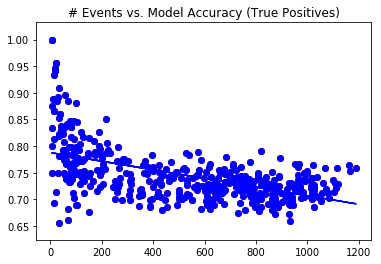

In [280]:
#fig, hist = plt.subplots(1, 2, sharex = True)
x = perf_results['num_events-R']
y = perf_results['model_score-R']
plt.scatter(x,y, color = 'red')

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,y,'o', x, line, color = 'blue')
#plt.hist(RHP_90d['counts'], bins, alpha = 0.5, label = 'RHP')
#plt.hist(LHP_90d['counts'], bins, alpha = 0.5, label = 'LHP')
#plt.legend(loc='upper right')
plt.title('# Events vs. Model Accuracy (True Positives)')
plt.show()

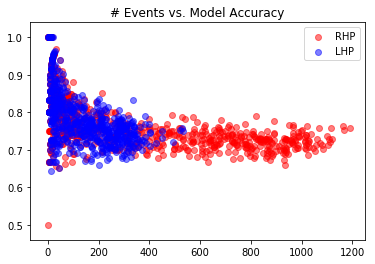

In [295]:
#fig, hist = plt.subplots(1, 2, sharex = True)
xr = perf_results['num_events-R']
yr = perf_results['model_score-R']
plt.scatter(xr,yr, color = 'red', alpha = 0.5, label = 'RHP')

xl = perf_results['num_events-L']
yl = perf_results['model_score-L']
plt.scatter(xl,yl, color = 'blue', alpha = 0.5, label = 'LHP')
plt.legend(loc='upper right')
plt.title('# Events vs. Model Accuracy')
plt.show()


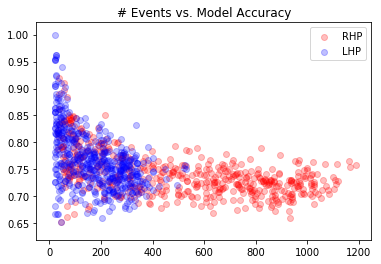

In [296]:
#fig, hist = plt.subplots(1, 2, sharex = True)
xr = filtered['num_events-R']
yr = filtered['model_score-R']
plt.scatter(xr,yr, color = 'red', alpha = 0.25, label = 'RHP')

xl = filtered['num_events-L']
yl = filtered['model_score-L']
plt.scatter(xl,yl, color = 'blue', alpha = 0.25, label = 'LHP')
plt.legend(loc='upper right')
plt.title('# Events vs. Model Accuracy')
plt.show()


#### Comments
- Model performance decreases with greater #s
- Could suggest we should process results more frequently (say, weekly), OR that we should consider other models

#### To Do
- Clean up append of record count and model performance so we get RH and LH results, separately (currently overwriting w/LH data only)
- Look at histograms of results above, to observe distribution of model performance results